<a href="https://colab.research.google.com/github/luciainnocenti/Homework1-Wines/blob/master/MLDL_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

In [ ]:
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from numpy import random 

random.seed(33)

In [ ]:
wine = datasets.load_wine()
X = wine.data[:, :2] #I select only the first two features from the entire dataset
y = wine.target

Let's show some statistict of the dataset:

In [ ]:
stats.describe(X)

In [ ]:
print(wine['DESCR'])

## Best features selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#X = wine.data[:, :] #I select only the first two features from the entire dataset
#y = wine.target
#X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
#X = X_new.copy()

I will plot the extracted features from the original dataset, using colors in order to identify different labels:

(-0.26, 6.8)

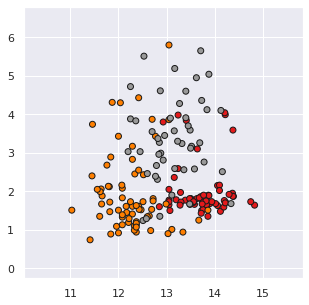

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #define max and min value of X for the plot
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #define max and min value of Y for the plot

plt.figure(2, figsize=(5, 5))
plt.clf()
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

Apply standardization:

In [ ]:
X_std = (X - X.mean())/X.std()

X_train, X_1, y_train, y_1 = train_test_split(X_std,y,test_size=0.5, shuffle=True, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_1,y_1,test_size=0.6, shuffle=True, stratify = y_1)

In [ ]:
X_norm = (X-X.min())/(X.max() - X.min())

X_train, X_1, y_train, y_1 = train_test_split(X_norm,y,test_size=0.5, shuffle=True, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_1,y_1,test_size=0.6, shuffle=True, stratify = y_1)

Some elements useful for plots:

In [ ]:
# Create color maps
cmap_light = ListedColormap(['silver', 'olive', 'orangered'])
cmap_bold = ListedColormap(['yellow', 'blue', 'black'])

In [ ]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


#1. KNN MODEL

## 1.1 Training

In [ ]:
#Apply the kNN algorithm on the training set
i = 0
acc = [0,0,0,0]
score = [0,0,0,0]
recall = [0,0,0,0]
precis = [0,0,0,0]
conf_matrix = []
for k in  [1, 3, 5, 7]:
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    val_mod = model.predict(np.c_[xx.ravel(), yy.ravel()])

    validation = model.predict(X_val)

    val_mod = val_mod.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, val_mod, cmap=cmap_light)
    plt.title("Validation boundary and train points, with K = " + str(k))

    # Plot also the training points
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap_bold, s=20)
    
    #Evaluation of accuracy:
    acc[i] = accuracy_score(y_val, validation)
    score[i] = f1_score(y_val, validation, average = 'weighted')
    precis[i] = precision_score(y_val, validation, average = 'weighted')
    recall[i] = recall_score(y_val, validation , average = 'weighted')
    conf_matrix.append(confusion_matrix(y_val, validation))
    i = i+1

    #Plot the confusion matrix:
    cm = plot_confusion_matrix(model, X_train, y_train)
    cm.ax_.set_title("Confusion matrix for training set on K = " + str(k) )

In [ ]:
Ks = [1,3,5,7]
print("Let's show the performances in the validation set:")
for i in [0, 1, 2, 3]:
  print("\nAccuracy, with K = " + str(Ks[i]) + " is equal to " + str(acc[i]))
  print("F1_score = " , score[i])
  print("Precision score = " , precis[i])
  print("Recall_score = " , recall[i])
  print(conf_matrix[i])

Let's show the performances in the validation set:

Accuracy, with K = 1 is equal to 0.7714285714285715
F1_score =  0.7615384615384615
Precision score =  0.7591836734693878
Recall_score =  0.7714285714285715
[[11  0  1]
 [ 0 12  2]
 [ 3  2  4]]

Accuracy, with K = 3 is equal to 0.8285714285714286
F1_score =  0.8222527472527472
Precision score =  0.8244897959183675
Recall_score =  0.8285714285714286
[[11  0  1]
 [ 0 13  1]
 [ 3  1  5]]

Accuracy, with K = 5 is equal to 0.7428571428571429
F1_score =  0.7480855986119145
Precision score =  0.7589743589743589
Recall_score =  0.7428571428571429
[[10  0  2]
 [ 0 11  3]
 [ 3  1  5]]

Accuracy, with K = 7 is equal to 0.7714285714285715
F1_score =  0.7784615384615384
Precision score =  0.7926406926406926
Recall_score =  0.7714285714285715
[[10  0  2]
 [ 0 11  3]
 [ 2  1  6]]


## 1.2 Test

In [ ]:
#Evaluate the model on the test set:
X_new = np.concatenate( (X_train, X_val), axis=0)
y_new = np.concatenate( (y_train, y_val), axis=0)

best_k = Ks[acc.index(max(acc))]
model = KNeighborsClassifier(n_neighbors=best_k).fit(X_new, y_new)
testing = model.predict(X_test)

#Evaluation of accuracy:
acc = accuracy_score(y_test, testing)
score = f1_score(y_test, testing, average = 'weighted')
precis = precision_score(y_test, testing, average = 'weighted')
recall = recall_score(y_test, testing, average = 'weighted')
conf_matrix = confusion_matrix(y_test, testing)

print("Work in test set: \nAccuracy, with K =", best_k, "is equal to %.2f" %acc)
print("Score = ", str(score), "; precis = ", str(precis), "; recall = ", str(recall))
print("Confusion matrix:")
conf_matrix

Work in test set: 
Accuracy, with K = 3 is equal to 0.81
Score =  0.8111744222855335 ; precis =  0.816137566137566 ; recall =  0.8148148148148148
Confusion matrix:


array([[17,  1,  0],
       [ 2, 17,  2],
       [ 2,  3, 10]])

#2. LINEAR SVM METHOD

## 2.1 Training

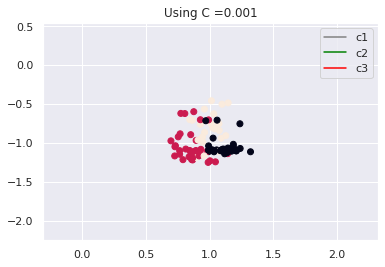

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


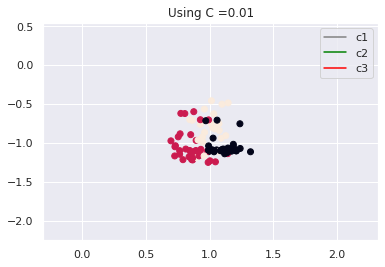

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


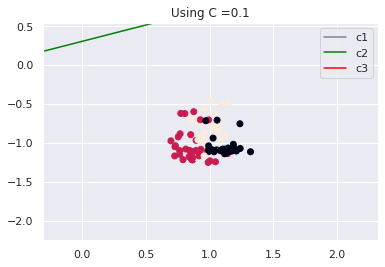

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


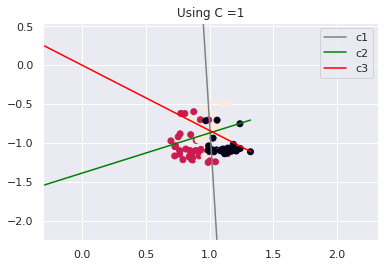

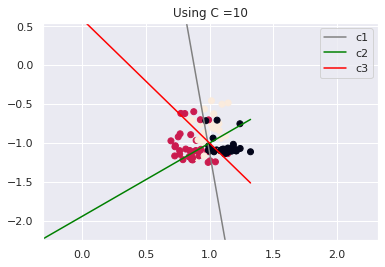

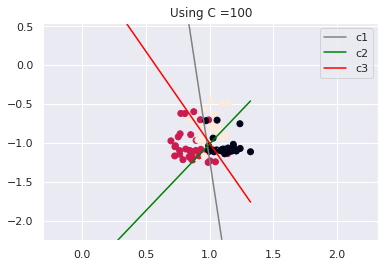

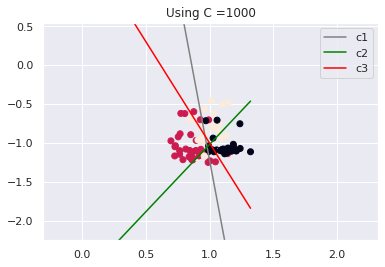

In [ ]:
#
i = 0
acc = [0,0,0,0,0,0,0]
score = [0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0]
precis = [0,0,0,0,0,0,0]
conf_matrix = []
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = svm.SVC( kernel = "linear", C = c).fit(X_train, y_train)
    
    # get the separating hyperplane
    w1 = model.coef_[0]
    w2 = model.coef_[1]
    w3 = model.coef_[2
                    ]
    a1 = -w1[0] / w1[1]
    a2 = -w2[0] / w2[1]
    a3 = -w3[0] / w3[1]
    
    xx = np.linspace(X_train.min(), X_train.max())
    yy1 = a1 * xx - (model.intercept_[0]) / w1[1]
    yy2 = a2 * xx - (model.intercept_[1]) / w2[1]
    yy3 = a3 * xx - (model.intercept_[2]) / w3[1]
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    h0 = plt.plot(xx, yy1, 'k-', color='grey', label="c1")
    h1 = plt.plot(xx, yy2, 'k-', color='green', label="c2")
    h2 = plt.plot(xx, yy3, 'k-', color='red', label="c3")
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
    plt.legend()
    plt.title("Using C =" + str(c))
    plt.show()

    validation = model.predict(X_val)
    #Evaluation of accuracy:
    acc[i] = accuracy_score(y_val, validation)
    score[i] = f1_score(y_val, validation, average = 'weighted')
    precis[i] = precision_score(y_val, validation, average = 'weighted')
    recall[i] = recall_score(y_val, validation, average = 'weighted')
    conf_matrix.append(confusion_matrix(y_val, validation))
    i = i+1


In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in [0, 1, 2, 3, 4, 5, 6]:
  print("\nAccuracy, with C = " + str(Cs[i]) + " is equal to %.2f" %acc[i])
  print("F1_score = " , score[i])
  print("Precision score = " , precis[i])
  print("Recall_score = " , recall[i])
  print("Confusion matrix:")
  print(conf_matrix[i])


Accuracy, with C = 0.001 is equal to 0.40
F1_score =  0.22857142857142862
Precision score =  0.16
Recall_score =  0.4
Confusion matrix:
[[ 0 12  0]
 [ 0 14  0]
 [ 0  9  0]]

Accuracy, with C = 0.01 is equal to 0.40
F1_score =  0.22857142857142862
Precision score =  0.16
Recall_score =  0.4
Confusion matrix:
[[ 0 12  0]
 [ 0 14  0]
 [ 0  9  0]]

Accuracy, with C = 0.1 is equal to 0.40
F1_score =  0.22857142857142862
Precision score =  0.16
Recall_score =  0.4
Confusion matrix:
[[ 0 12  0]
 [ 0 14  0]
 [ 0  9  0]]

Accuracy, with C = 1 is equal to 0.80
F1_score =  0.7943348026447605
Precision score =  0.8012441340172431
Recall_score =  0.8
Confusion matrix:
[[10  1  1]
 [ 0 13  1]
 [ 1  3  5]]

Accuracy, with C = 10 is equal to 0.80
F1_score =  0.7983722424502034
Precision score =  0.7986147186147187
Recall_score =  0.8
Confusion matrix:
[[ 9  1  2]
 [ 0 13  1]
 [ 2  1  6]]

Accuracy, with C = 100 is equal to 0.89
F1_score =  0.8807692307692307
Precision score =  0.8857142857142857
Reca

## 2.2 Test

In [ ]:
X_new = np.concatenate( (X_train, X_val), axis=0)
y_new = np.concatenate( (y_train, y_val), axis=0)
best_c = Cs[acc.index(max(acc))]
model = svm.SVC( kernel = "linear", C = best_c).fit(X_new, y_new)
testing = model.predict(X_test)

acc = accuracy_score(y_test, testing)
score = f1_score(y_test, testing, average = 'weighted')
precis = precision_score(y_test, testing, average = 'weighted')
recall = recall_score(y_test, testing, average = 'weighted')
conf_matrix = confusion_matrix(y_test, testing)


print("Work in test set: \nAccuracy, with C = ", best_c, ", is equal to %.2f" %acc)
print("Score = ", str(score), "; precis = ", str(precis), "; recall = ", str(recall))
print(conf_matrix)

Work in test set: 
Accuracy, with C =  100 , is equal to 0.80
Score =  0.7962962962962963 ; precis =  0.7962962962962963 ; recall =  0.7962962962962963
[[14  1  3]
 [ 2 18  1]
 [ 2  2 11]]


#3. RBF KERNEL SVM METHOD

##3.1 Training

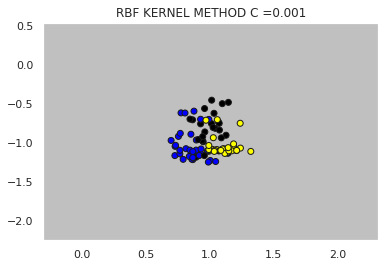

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


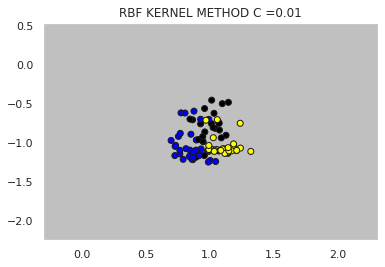

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


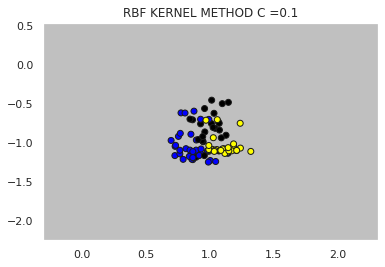

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


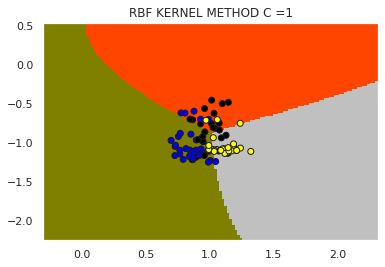

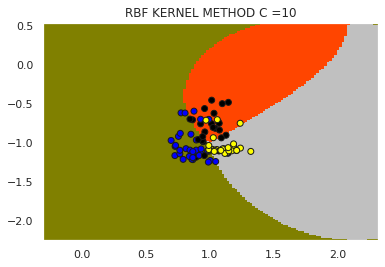

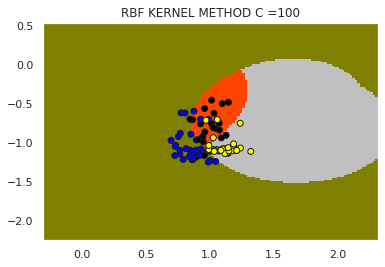

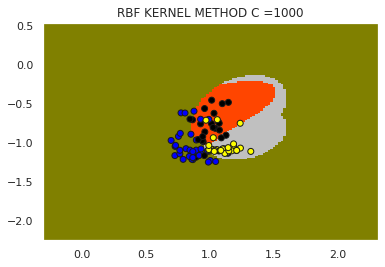

In [ ]:
#
i = 0
acc = [0,0,0,0,0,0,0]
score = [0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0]
precis = [0,0,0,0,0,0,0]
conf_matrix = []
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
h=.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = svm.SVC( kernel = "rbf", C = c).fit(X_train, y_train)
    
    validation = model.predict(X_val)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z,  cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolors='k')
    plt.title('RBF KERNEL METHOD C =' + str(c))
    plt.axis('tight')
    plt.show()

    #Evaluation of accuracy:
    acc[i] = accuracy_score(y_val, validation)
    score[i] = f1_score(y_val, validation, average = 'weighted')
    precis[i] = precision_score(y_val, validation, average = 'weighted')
    recall[i] = recall_score(y_val, validation, average = 'weighted')
    conf_matrix.append(confusion_matrix(y_val, validation))
    i = i+1 

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in [0, 1, 2, 3, 4, 5, 6]:
  print("\nAccuracy, with C = " + str(Cs[i]) + " is equal to %.2f" %acc[i])
  print("F1_score = " , score[i])
  print("Precision score = " , precis[i])
  print("Recall_score = " , recall[i])
  print("Confusion matrix:")
  print(conf_matrix[i])


Accuracy, with C = 0.001 is equal to 0.40
F1_score =  0.22857142857142862
Precision score =  0.16
Recall_score =  0.4
Confusion matrix:
[[ 0 12  0]
 [ 0 14  0]
 [ 0  9  0]]

Accuracy, with C = 0.01 is equal to 0.40
F1_score =  0.22857142857142862
Precision score =  0.16
Recall_score =  0.4
Confusion matrix:
[[ 0 12  0]
 [ 0 14  0]
 [ 0  9  0]]

Accuracy, with C = 0.1 is equal to 0.40
F1_score =  0.22857142857142862
Precision score =  0.16
Recall_score =  0.4
Confusion matrix:
[[ 0 12  0]
 [ 0 14  0]
 [ 0  9  0]]

Accuracy, with C = 1 is equal to 0.83
F1_score =  0.8263159176714164
Precision score =  0.8295454545454545
Recall_score =  0.8285714285714286
Confusion matrix:
[[10  1  1]
 [ 0 13  1]
 [ 1  2  6]]

Accuracy, with C = 10 is equal to 0.80
F1_score =  0.7983722424502034
Precision score =  0.7986147186147187
Recall_score =  0.8
Confusion matrix:
[[ 9  1  2]
 [ 0 13  1]
 [ 2  1  6]]

Accuracy, with C = 100 is equal to 0.77
F1_score =  0.7735861392611963
Precision score =  0.777662

## 3.2 Test

In [ ]:
best_c = Cs[max(enumerate(acc))[0]]
X_new = np.concatenate( (X_train, X_val), axis=0)
y_new = np.concatenate( (y_train, y_val), axis=0)
model = svm.SVC( kernel = "rbf", C = best_c).fit(X_new, y_new)
    
testing = model.predict(X_test)

#Evaluation of accuracy:
acc = accuracy_score(y_test, testing)
score = f1_score(y_test, testing, average = 'weighted')
precis = precision_score(y_test, testing, average = 'weighted')
recall = recall_score(y_test, testing, average = 'weighted')
conf_matrix = confusion_matrix(y_test, testing)


print("Work in test set: \n Accuracy, with C =", best_c, ", is equal to %.2f" %acc)
print("Score = ", str(score), "; precis = ", str(precis), "; recall = ", str(recall))
print(conf_matrix)

Work in test set: 
 Accuracy, with C = 1000 , is equal to 0.80
Score =  0.7959517657192076 ; precis =  0.7963953258070906 ; recall =  0.7962962962962963
[[14  1  3]
 [ 2 18  1]
 [ 1  3 11]]


## 3.3 Hyperparameters fitting

In [ ]:
import numpy as np 
# base = 10 
Cs = np.logspace(-1, 2, num=4)
gammas = np.logspace(0,3, num=4)
gammas

array([   1.,   10.,  100., 1000.])

In [ ]:
svc = svm.SVC(kernel='rbf')

In [ ]:
i = 0
j = 0
scores = [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]]
for C in Cs:
  for gamma in gammas:
    svc.C = C
    svc.gamma = gamma
    svc.fit(X_train, y_train)
    this_score = svc.score(X_val, y_val)
    scores[i][j] = this_score
    j = j+1
  j = 0
  i = i+1



[]

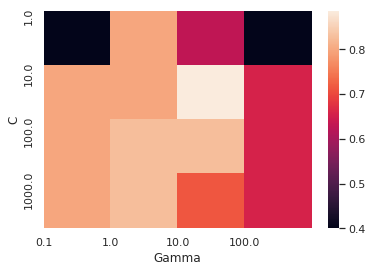

In [ ]:
import seaborn as sns; sns.set()

ax = sns.heatmap(scores)
# We want to show all ticks...
ax.set_xticks(np.arange(len(Cs)))
ax.set_yticks(np.arange(len(gammas)))
# and label them with the respective list entries
ax.set_xticklabels(Cs)
ax.set_yticklabels(gammas)
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.plot()

In [ ]:
C = 10
gamma = 10

svc.C = C
svc.gamma = gamma
svc.fit(X_new, y_new)
testing = svc.predict(X_test)

score = svc.score(X_test, y_test)
score


0.7962962962962963

In [ ]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
h=.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

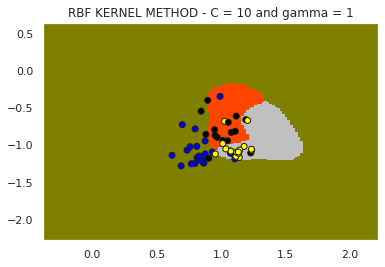

In [ ]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z,  cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolors='k')
plt.title('RBF KERNEL METHOD - C = 10 and gamma = 1')
plt.axis('tight')
plt.show()

# 4. K-FOLD METHOD

## 4.1 Training

In [ ]:
X_new = np.concatenate( (X_train, X_val), axis=0)
y_new = np.concatenate( (y_train, y_val), axis=0)

In [ ]:
Cs = np.logspace(-1, 2, num=4)
gammas = np.logspace(0,3, num=4)

In [ ]:
 parameters = {'C': Cs, 'gamma':gammas}

In [ ]:
model = svm.SVC(kernel = "rbf")
clf = GridSearchCV(model, parameters)
clf.fit(X_new, y_new)

print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 1.0, 'gamma': 100.0} with a score of 0.83


## 4.2 Testing

In [ ]:
c =clf.best_params_['C']
gamma = clf.best_params_['gamma']
model = svm.SVC( kernel = "rbf", C = c, gamma = gamma).fit(X_new, y_new)
    
testing = model.predict(X_test)

#Evaluation of accuracy:
acc = accuracy_score(y_test, testing)
conf_matrix = (confusion_matrix(y_test, testing))
score = f1_score(y_test, testing, average = 'weighted')
precis = precision_score(y_test, testing, average = 'weighted')
recall = recall_score(y_test, testing, average = 'weighted')


print("Work in test set: \nC = ", str(c), "and gamma = ", str(gamma), ". Accuracy is equal to %.2f" %acc)
print("Score = ", str(score), "; precis = ", str(precis), "; recall = ", str(recall))
print(conf_matrix)

Work in test set: 
C =  1.0 and gamma =  100.0 . Accuracy is equal to 0.76
Score =  0.7589784906858078 ; precis =  0.7594541910331385 ; recall =  0.7592592592592593
[[15  1  2]
 [ 2 16  3]
 [ 2  3 10]]


# Analysis for selecting other features

alcohol


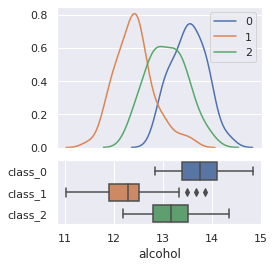

malic_acid


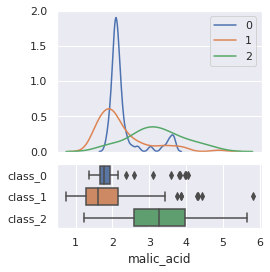

ash


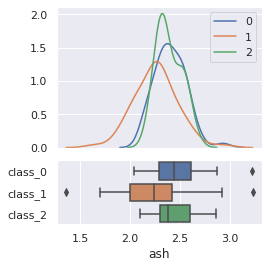

alcalinity_of_ash


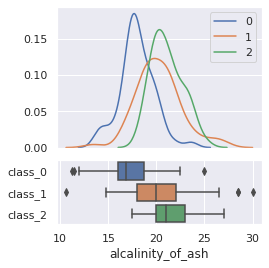

magnesium


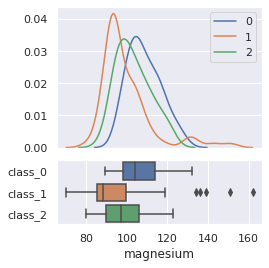

total_phenols


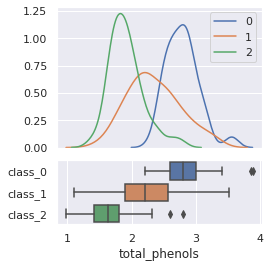

flavanoids


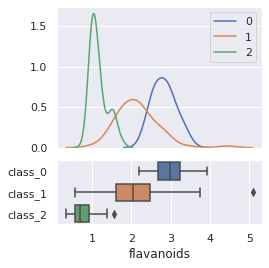

nonflavanoid_phenols


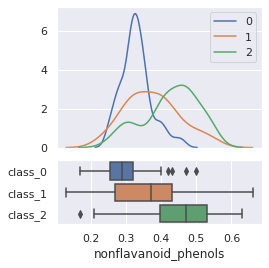

proanthocyanins


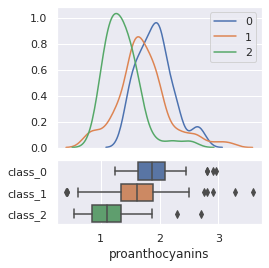

color_intensity


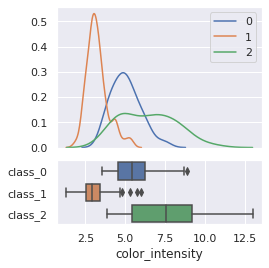

hue


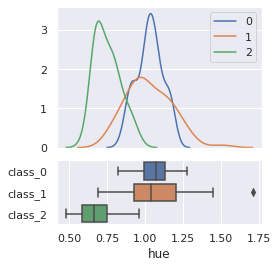

od280/od315_of_diluted_wines


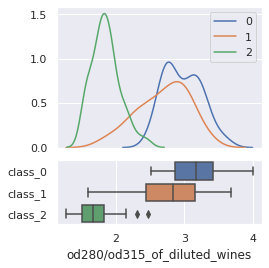

proline


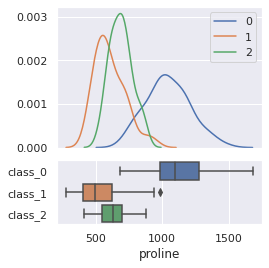

In [ ]:
import matplotlib.gridspec as gridspec
import pandas as pd

features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])

for feature in wine['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()